# Image Classification using CNN
CIFAR Dataset - the 10 classification categories are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck




In [3]:
#importing necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
#importcifar dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
#print shape of data and labels

X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
Y_train.shape,Y_test.shape

((50000, 1), (10000, 1))

The labels here show supervised learning since the test and trainig sets have labelled images: where 0: airplane', 1:'automobile', 2:'bird', 3: 'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8: 'ship', 9:'truck'



In [6]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [45]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [30]:
#reshaping the images labels - flattening the arrays
train_labels=Y_train.reshape(-1,)
test_labels=Y_test.reshape(-1,)

In [9]:
#plot to visualize
#small image to see clearly
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

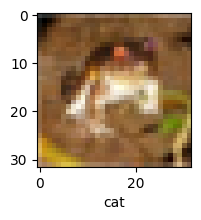

In [10]:
#plotting the sample
plot_sample(X_train,train_labels,0)

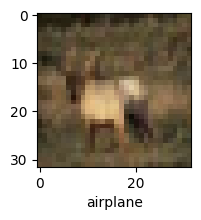

In [11]:
#plotting the sample
plot_sample(X_train,train_labels,3)

In [12]:
# normalize the data to divide by the pixel value 0~255
X_train, X_test = X_train / 255.0, X_test / 255.0

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

> First I have built the simple traditional artificial neural network (ANN) to compare its performance with the CNNs later on.

In [14]:
#Flatten the images for ANN - since in ANNs we use 1D array not the 3-channel of RGB or some 2D or 3D image.
X_train_flatten = X_train.reshape(-1, 32 * 32 * 3)
X_test_flatten = X_test.reshape(-1, 32 * 32 * 3)

In [15]:
#Define the ANN
ann = models.Sequential([
        layers.Dense(512, activation='relu',input_shape=(3072,)),  # 3072 is 32*32*3 = total pixels : len*width*total channels
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')    # 10 output classes
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Compile the model
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [18]:
#train model
history = ann.fit(X_train_flatten, Y_train, epochs=5)
validation_data = (X_test_flatten,Y_test)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2880 - loss: 1.9684
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.3994 - loss: 1.6974
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4357 - loss: 1.5972
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4597 - loss: 1.5374
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.4707 - loss: 1.4973


In [19]:
##evaluate the model
loss, accuracy = ann.evaluate(X_test_flatten, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4333 - loss: 1.6495
Test Loss: 1.6487646102905273
Test Accuracy: 0.43059998750686646


> The progress of the ANN's training over 4 epochs shows that with each epoch, the model's accuracy generally improves and the loss decreases, indicating that model is learning from the training data.

In [20]:
#make predictions
y_pred = ann.predict(X_test_flatten)
y_pred_classes = [np.argmax(element) for element in y_pred]

y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[6.35019839e-02, 2.51462072e-01, 6.57531098e-02, 2.18600288e-01,
        2.35728770e-02, 7.62554780e-02, 1.05061106e-01, 4.40830132e-03,
        1.85204342e-01, 6.18039398e-03],
       [5.54577857e-02, 3.53983998e-01, 7.04726495e-04, 3.89477093e-04,
        6.12105010e-04, 7.99091795e-05, 3.89559937e-05, 1.88400518e-04,
        4.17180210e-01, 1.71364456e-01],
       [1.47828177e-01, 3.74801815e-01, 9.05736291e-04, 2.54934217e-04,
        6.62549050e-04, 2.24177653e-04, 1.04812398e-05, 6.53010444e-04,
        4.21812713e-01, 5.28464653e-02],
       [3.66371512e-01, 1.17465675e-01, 7.65460823e-03, 1.29674864e-03,
        5.48061961e-03, 1.04255369e-03, 1.45181373e-04, 6.91697188e-03,
        4.82045531e-01, 1.15805948e-02],
       [2.65552718e-02, 2.28578094e-02, 8.33600760e-02, 3.62391062e-02,
        5.51553071e-01, 4.62559350e-02, 1.41669571e-01, 5.93455285e-02,
        2.85022054e-02, 3.66145023e-03]], dtype=float32)

In [22]:
#verify predictions
print(np.argmax(y_pred[0]))
print(classes[np.argmax(y_pred[0])])

1
automobile


Correct Prediction since 1 position in the array is automobile.

In [23]:
from sklearn.metrics import classification_report

# Assuming 'y_pred_classes' contains the predicted classes
# and 'Y_test' contains the true classes

# Generate the classification report
report = classification_report(Y_test, y_pred_classes, target_names=classes)

# Print the report
print(report)


              precision    recall  f1-score   support

    airplane       0.34      0.69      0.46      1000
  automobile       0.37      0.80      0.51      1000
        bird       0.40      0.19      0.26      1000
         cat       0.37      0.19      0.25      1000
        deer       0.50      0.27      0.35      1000
         dog       0.45      0.23      0.31      1000
        frog       0.49      0.52      0.50      1000
       horse       0.53      0.47      0.50      1000
        ship       0.50      0.61      0.55      1000
       truck       0.53      0.34      0.41      1000

    accuracy                           0.43     10000
   macro avg       0.45      0.43      0.41     10000
weighted avg       0.45      0.43      0.41     10000



1. Low Precision and Recall: Most classes have relatively low precision and recall values, indicating that the model is struggling to correctly identify instances of those classes.
2. Imbalanced Performance: The model performs better on certain classes (e.g., "automobile") compared to others (e.g., "bird", "cat").
3. Low F1-scores: The F1-scores are generally low, which is also a bad performance indicator.

>Now let's use CNN for prediction.

In [24]:
#CNNS: dense network
cnn = models.Sequential([

        #cnn
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),      #input layer
        layers.Dense(10, activation='softmax')    # 10 output classes - softmac: normalizes the probabilities
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#complie
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#train
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3709 - loss: 1.7344
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5620 - loss: 1.2399
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.6246 - loss: 1.0722
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6522 - loss: 0.9937
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - accuracy: 0.6715 - loss: 0.9332
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6940 - loss: 0.8815
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.7053 - loss: 0.8450
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7177 - loss: 0.8090
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7290 - loss: 0.7737
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7413 - loss: 0.7400


In [27]:
#evaluate the cnn model
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6714 - loss: 0.9541


[0.9538038969039917, 0.6754000186920166]

>Here this model came out to be 70% accurate on the test set, which is pretty decent value in such a dataset.

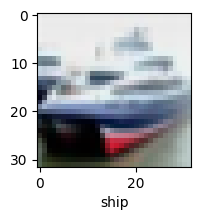

In [31]:
# check model
plot_sample(X_test,test_labels,1)

In [40]:
#predict
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[3.30929947e-03, 1.37983108e-04, 8.52422905e-04, 3.03512365e-01,
        6.21063460e-04, 6.35485828e-01, 7.65773514e-03, 8.64610920e-05,
        4.79003936e-02, 4.36394708e-04],
       [1.04239151e-01, 1.73395313e-02, 4.42597258e-04, 7.39783991e-06,
        1.44251699e-05, 2.12274614e-07, 1.11622103e-06, 7.42845145e-08,
        8.77523482e-01, 4.31908848e-04],
       [3.31859142e-02, 1.02207027e-02, 3.15583311e-04, 6.38551486e-04,
        7.72065032e-05, 5.46467782e-05, 3.49019683e-05, 1.93199867e-05,
        9.54345644e-01, 1.10750797e-03],
       [8.01952839e-01, 2.63147126e-03, 5.07785082e-02, 6.89931854e-04,
        2.37033963e-02, 5.52577731e-05, 3.29047791e-04, 2.09642356e-04,
        1.19458996e-01, 1.90798921e-04],
       [4.16511693e-06, 1.39084132e-05, 6.12783479e-03, 1.18988631e-02,
        7.13382900e-01, 2.35782820e-03, 2.66147494e-01, 3.52237912e-05,
        3.07315568e-05, 9.83461291e-07]], dtype=float32)

In [47]:
#check from the classes
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[5, 8, 8, 0, 4]

> # Comparison:
The CNN model outperformed the ANN model on the CIFAR-10 dataset, primarily because of its ability to learn and exploit the spatial structure of the images. This reinforces the strength of CNNs for image-based machine learning tasks.

> ### ANN (Artificial Neural Network):
>1. Architecture: A traditional neural network with fully connected layers.
> 2. Performance: Achieved a lower accuracy compared to the CNN. The model had have difficulties learning complex patterns in the images.
> 3. Data Handling: Requires flattening the images into a 1D array, which loses spatial information.

> ### CNN (Convolutional Neural Network)
> 1. Architecture: Designed for image data, uses convolutional and pooling layers to extract features.
> 2. Performance: Achieved higher accuracy on the test set. Hence CNN can do better feature extraction and can learn better the of patterns within the images.
> 3. Data Handling: Works directly on image data, preserving spatial information crucial for image recognition tasks.

